In [1]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np 
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator ,img_to_array, load_img
#from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense  
from keras import applications  
from keras.utils.np_utils import to_categorical  
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import math  
import datetime
import time

In [3]:
# Loading up our image datasets
# Default dimensions we found online
img_width, img_height = 224, 224  
   
# Create a bottleneck file
top_model_weights_path = 'bottleneck_fc_model.h5' 

# loading up our datasets
train_data_dir = 'data/train'  
validation_data_dir = 'data/val'  
test_data_dir = 'data/test'
   
# number of epochs to train top model  
epochs = 7 #this has been changed after multiple model run  
# batch size used by flow_from_directory and predict_generator  
batch_size = 50  

In [4]:
#Loading vgc16 model
vgg16 = applications.VGG16(include_top=False, weights='imagenet') 

In [5]:
datagen = ImageDataGenerator(rescale=1. / 255)  #needed to create the bottleneck .npy files

In [ ]:
# # Creation of weights/features with VGG16
#__this can take an hour and half to run so only run it once. 
#once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__

start = datetime.datetime.now()
   
generator = datagen.flow_from_directory(  
     train_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  
   
nb_train_samples = len(generator.filenames)  
num_classes = len(generator.class_indices)  
   
predict_size_train = int(math.ceil(nb_train_samples / batch_size))  
   
bottleneck_features_train = vgg16.predict_generator(generator, predict_size_train)  
   
np.save('bottleneck_features_train.npy', bottleneck_features_train)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 18322 images belonging to 10 classes.


C:\Users\MAHESH RAUT\AppData\Local\Temp\ipykernel_10400\2973591495.py:18: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  bottleneck_features_train = vgg16.predict_generator(generator, predict_size_train)


In [9]:
print('-'*117)

---------------------------------------------------------------------------------------------------------------------


In [10]:
#__this can take half an hour to run so only run it once. once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__

start = datetime.datetime.now()
generator = datagen.flow_from_directory(  
     validation_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  
   
nb_validation_samples = len(generator.filenames)  
   
predict_size_validation = int(math.ceil(nb_validation_samples / batch_size))  
   
bottleneck_features_validation = vgg16.predict_generator(  
     generator, predict_size_validation)  
   
np.save('bottleneck_features_validation.npy', bottleneck_features_validation) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 5232 images belonging to 10 classes.


C:\Users\MAHESH RAUT\AppData\Local\Temp\ipykernel_7608\2798664618.py:15: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  bottleneck_features_validation = vgg16.predict_generator(


Time:  0:08:17.924107


In [11]:
print('-'*117)

---------------------------------------------------------------------------------------------------------------------


In [12]:
#__this can take half an hour to run so only run it once. once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__

start = datetime.datetime.now()
generator = datagen.flow_from_directory(  
     test_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  
   
nb_test_samples = len(generator.filenames)  
   
predict_size_test = int(math.ceil(nb_test_samples / batch_size))  
   
bottleneck_features_test = vgg16.predict_generator(  
     generator, predict_size_test)  
   
np.save('bottleneck_features_test.npy', bottleneck_features_test) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 2625 images belonging to 10 classes.


C:\Users\MAHESH RAUT\AppData\Local\Temp\ipykernel_7608\143667794.py:15: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  bottleneck_features_test = vgg16.predict_generator(


Time:  0:04:11.246025


In [6]:
# Loading training, validation and testing data
#training data
generator_top = datagen.flow_from_directory(  
         train_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode='categorical',  
         shuffle=False)  
   
nb_train_samples = len(generator_top.filenames)  
num_classes = len(generator_top.class_indices)  
   
# load the bottleneck features saved earlier  
train_data = np.load('bottleneck_features_train.npy')  
   
# get the class lebels for the training data, in the original order  
train_labels = generator_top.classes  
   
# convert the training labels to categorical vectors  
train_labels = to_categorical(train_labels, num_classes=num_classes) 

Found 18322 images belonging to 10 classes.


In [7]:
#validation data
generator_top = datagen.flow_from_directory(  
         validation_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  
   
nb_validation_samples = len(generator_top.filenames)  
   
validation_data = np.load('bottleneck_features_validation.npy')  
   

validation_labels = generator_top.classes  
validation_labels = to_categorical(validation_labels, num_classes=num_classes)  

Found 5232 images belonging to 10 classes.


In [8]:
#testing data
generator_top = datagen.flow_from_directory(  
         test_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  
   
nb_test_samples = len(generator_top.filenames)  
   
test_data = np.load('bottleneck_features_test.npy')  
   

test_labels = generator_top.classes  
test_labels = to_categorical(test_labels, num_classes=num_classes)

Found 2625 images belonging to 10 classes.


In [9]:
# Training of model
#This is the best model we found. For additional models, check out I_notebook.ipynb
start = datetime.datetime.now()
model = Sequential()  
model.add(Flatten(input_shape=train_data.shape[1:]))  
model.add(Dense(100, activation=keras.layers.LeakyReLU(alpha=0.3)))  
model.add(Dropout(0.5))  
model.add(Dense(50, activation=keras.layers.LeakyReLU(alpha=0.3)))  
model.add(Dropout(0.3)) 
model.add(Dense(num_classes, activation='softmax'))  

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])  

history = model.fit(train_data, train_labels,  
      epochs=7,
      batch_size=batch_size,  
      validation_data=(validation_data, validation_labels))  

model.save_weights(top_model_weights_path)  

(eval_loss, eval_accuracy) = model.evaluate(  
 validation_data, validation_labels, batch_size=batch_size, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("[INFO] Loss: {}".format(eval_loss))  
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

C:\Users\tejas\anaconda3\envs\NEW\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/7
367/367 [==============================] - 25s 59ms/step - loss: 1.2402 - acc: 0.5877 - val_loss: 0.7674 - val_acc: 0.7425
Epoch 2/7
367/367 [==============================] - 18s 49ms/step - loss: 0.7836 - acc: 0.7454 - val_loss: 0.5992 - val_acc: 0.8215
Epoch 3/7
367/367 [==============================] - 18s 49ms/step - loss: 0.6390 - acc: 0.7882 - val_loss: 0.5469 - val_acc: 0.8228
Epoch 4/7
367/367 [==============================] - 17s 47ms/step - loss: 0.5557 - acc: 0.8185 - val_loss: 0.4791 - val_acc: 0.8479
Epoch 5/7
367/367 [==============================] - 17s 47ms/step - loss: 0.4888 - acc: 0.8375 - val_loss: 0.5418 - val_acc: 0.8205
Epoch 6/7
367/367 [==============================] - 17s 47ms/step - loss: 0.4394 - acc: 0.8541 - val_loss: 0.4660 - val_acc: 0.8526
Epoch 7/7
105/105 [==============================] - 1s 10ms/step - loss: 0.4664 - acc: 0.8513
[INFO] accuracy: 85.13%
[INFO] Loss: 0.46642598509788513
Time:  0:02:14.135413


In [10]:
#Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 100)               2508900   
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 2,514,460
Trainable params: 2,514,460
Non-

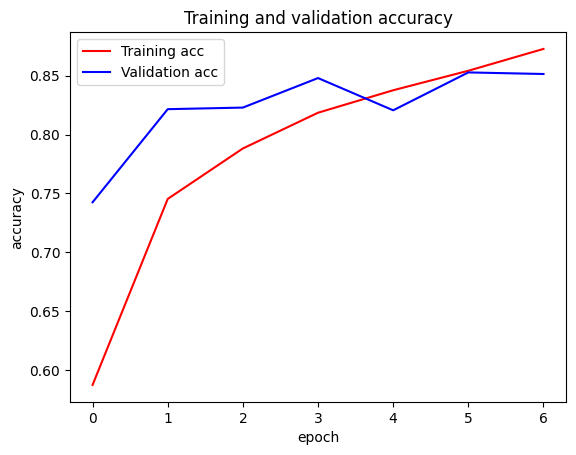

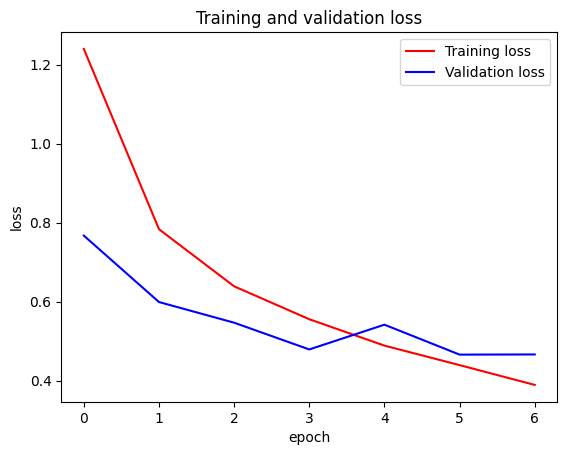

In [11]:
#Graphing our training and validation
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
plt.show()

In [12]:
# Model Evaluation on Testing Set
model.evaluate(test_data, test_labels)

83/83 [==============================] - 1s 11ms/step - loss: 0.4286 - acc: 0.8590


[0.42863303422927856, 0.8590475916862488]

In [13]:
# Classification metrics and Confusion Matrix
# Classification Metrics
print('test data', test_data)
preds = np.round(model.predict(test_data),0) 
#to fit them into classification metrics and confusion metrics, some additional modificaitions are required
print('rounded test_labels', preds)

test data [[[[3.33715111e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    6.56706810e-01 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    2.73423910e-01 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    4.31956440e-01 0.00000000e+00]
   ...
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    6.88610435e-01 0.00000000e+00]
   [5.74043803e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    8.31932545e-01 0.00000000e+00]
   [1.50720909e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    8.63506436e-01 0.00000000e+00]]

  [[1.65032089e-01 0.00000000e+00 1.51352227e-01 ... 0.00000000e+00
    3.74246001e-01 0.00000000e+00]
   [4.28095222e-01 0.00000000e+00 5.45497656e-01 ... 0.00000000e+00
    0.00000000e+00 0.00000000e+00]
   [1.00283071e-01 0.00000000e+00 1.49026483e-01 ... 0.00000000e+00
    6.55237854e-01 0.00000000e+00]
   ...
   [0.00000000e+00 0.00000000e+00 0.00000000e+0

In [14]:
animals = ['butterflies', 'cat','chickens','cow', 'dog', 'elephants', 'horses', 'sheep', 'spiders', 'squirells']
classification_metrics = metrics.classification_report(test_labels, preds, target_names=animals )
print(classification_metrics)

              precision    recall  f1-score   support

 butterflies       0.95      0.89      0.92       212
         cat       0.96      0.73      0.83       168
    chickens       0.98      0.74      0.84       311
         cow       0.75      0.83      0.79       187
         dog       0.83      0.89      0.86       487
   elephants       1.00      0.74      0.85       145
      horses       0.95      0.81      0.87       263
       sheep       0.87      0.65      0.74       182
     spiders       0.94      0.97      0.95       483
   squirells       0.94      0.72      0.82       187

   micro avg       0.90      0.83      0.86      2625
   macro avg       0.92      0.80      0.85      2625
weighted avg       0.91      0.83      0.86      2625
 samples avg       0.83      0.83      0.83      2625



C:\Users\tejas\anaconda3\envs\NEW\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
# Confusion Matrix
# Since our data is in dummy format we put the numpy array into a dataframe and call idxmax axis=1 to return the column
# label of the maximum value thus creating a categorical variable
# Basically, flipping a dummy variable back to it's categorical variable
categorical_test_labels = pd.DataFrame(test_labels).idxmax(axis=1)
categorical_preds = pd.DataFrame(preds).idxmax(axis=1)

In [16]:
confusion_matrix= confusion_matrix(categorical_test_labels, categorical_preds)

In [17]:
#To get better visual of the confusion matrix:
def plot_confusion_matrix(cm, classes,
             normalize=False,
             title='Confusion matrix',
             cmap=plt.cm.Blues):
    #Add Normalization Option
    '''prints pretty confusion metric with normalization option '''
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
#     print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization


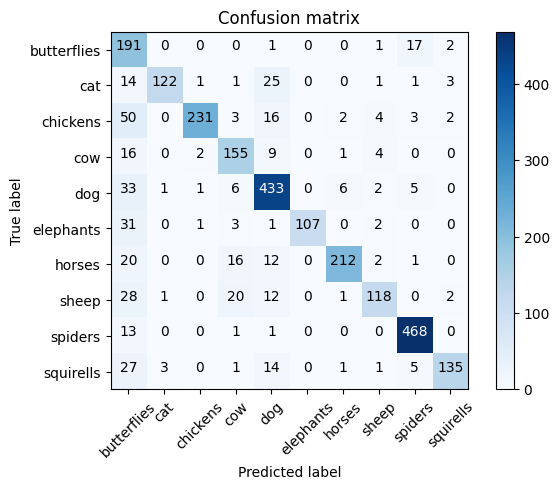

In [18]:
plot_confusion_matrix(confusion_matrix, ['butterflies', 'cat','chickens','cow', 'dog', 'elephants', 'horses', 'sheep', 'spiders', 'squirells'])

Normalized confusion matrix


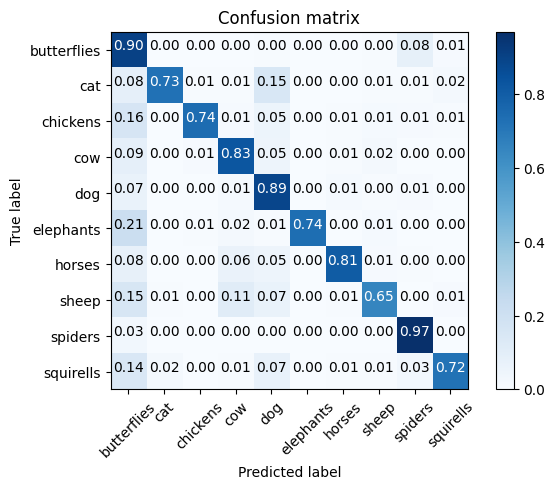

In [19]:
#Those numbers are all over the place. Now turning normalize= True
plot_confusion_matrix(confusion_matrix, 
                      ['butterflies', 'cat','chickens','cow', 'dog', 'elephants', 'horses', 'sheep', 'spiders', 'squirells'],
                     normalize=True)

In [20]:
## Testing images on model
def read_image(file_path):
    print("[INFO] loading and preprocessing image...")  
    image = load_img(file_path, target_size=(224, 224))  
    image = img_to_array(image)  
    image = np.expand_dims(image, axis=0)
    image /= 255.  
    return image

In [21]:
def test_single_image(path):
    animals = ['butterflies', 'cat','chickens','cow', 'dog', 'elephants', 'horses', 'sheep', 'spiders', 'squirells']
    images = read_image(path)
    time.sleep(.5)
    bt_prediction = vgg16.predict(images)  
    preds = model.predict(bt_prediction)  # Use predict instead of predict_proba
    for idx, animal, x in zip(range(0, 10), animals, preds[0]):
        print("ID: {}, Label: {} {}%".format(idx, animal, round(x*100, 2)))
    print('Final Decision:')
    time.sleep(.5)
    for x in range(3):
        print('.'*(x+1))
        time.sleep(.2)
    class_predicted = np.argmax(preds, axis=1)  # Use argmax to get the predicted class
    class_dictionary = generator_top.class_indices  
    inv_map = {v: k for k, v in class_dictionary.items()}  
    print("ID: {}, Label: {}".format(class_predicted[0], inv_map[class_predicted[0]]))  
    return load_img(path)

[INFO] loading and preprocessing image...
1/1 [==============================] - 0s 80ms/step
ID: 0, Label: butterflies 0.0%
ID: 1, Label: cat 0.0%
ID: 2, Label: chickens 0.0%
ID: 3, Label: cow 0.01%
ID: 4, Label: dog 0.01%
ID: 5, Label: elephants 99.95%
ID: 6, Label: horses 0.02%
ID: 7, Label: sheep 0.0%
ID: 8, Label: spiders 0.0%
ID: 9, Label: squirells 0.0%
Final Decision:
.
..
...
ID: 5, Label: elephant


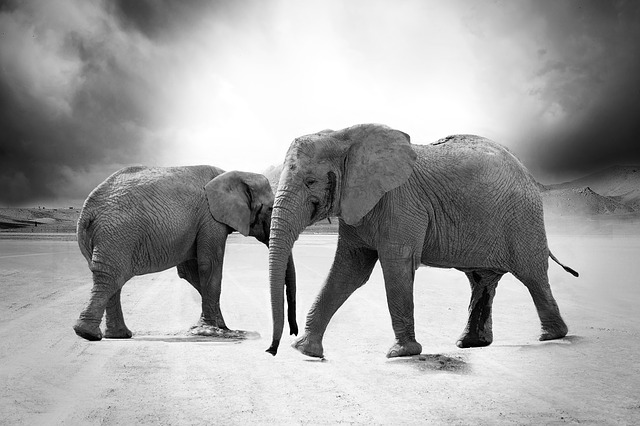

In [24]:
path ='C:/Users/tejas/Downloads/Mahesh/project/data/train/elephant/Elephant_0001.jpg'
test_single_image(path)